![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [68]:
import graphviz
from sklearn.tree import export_graphviz

In [2]:
features = pd.read_csv("./features.csv", delimiter=" ", header=None)

In [37]:
subject_train = pd.read_csv(r"subject_train.csv")

In [4]:
subject_test = pd.read_csv("subject_test.csv")

In [42]:
X_train = pd.read_csv(r"X_train.csv",delim_whitespace=True, index_col=[0, 1])

In [5]:
X_test = pd.read_csv("X_test.csv",  index_col=[0, 1])

In [6]:
y_test = pd.read_csv("y_test.csv")

In [7]:
y_train = pd.read_csv("y_train.csv")

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [10]:
%%time
clf = DecisionTreeClassifier(min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(subject_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: user 12.8 s, sys: 131 ms, total: 12.9 s
Wall time: 13 s


In [11]:
ccp_alphas

array([0.00000000e+00, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       6.80179567e-05, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       6.80179567e-05, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       6.80179567e-05, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       6.80179567e-05, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       6.80179567e-05, 8.00519029e-05, 2.34086414e-04, 2.75781897e-04,
       2.77755720e-04, 3.79766925e-04, 3.89749860e-04, 4.10132084e-04,
       4.58381882e-04, 6.70761696e-04, 7.12355804e-04, 8.16804098e-04,
       1.19678424e-03, 1.27558313e-03, 1.59056463e-03, 1.65819870e-03,
       1.68164210e-03, 1.70218093e-03, 1.83301882e-03, 1.84685045e-03,
       1.86778282e-03])

In [12]:
ccp_alpha = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alpha

array([0.00000000e+00, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       8.00519029e-05, 2.34086414e-04, 2.75781897e-04, 2.77755720e-04,
       3.79766925e-04, 3.89749860e-04, 4.10132084e-04, 4.58381882e-04,
       6.70761696e-04, 7.12355804e-04, 8.16804098e-04, 1.19678424e-03,
       1.27558313e-03, 1.59056463e-03, 1.65819870e-03, 1.68164210e-03,
       1.70218093e-03, 1.83301882e-03, 1.84685045e-03, 1.86778282e-03])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [17]:
%%time
clf = DecisionTreeClassifier(min_samples_leaf=10)
clf

CPU times: user 35 µs, sys: 2 µs, total: 37 µs
Wall time: 41.5 µs


DecisionTreeClassifier(min_samples_leaf=10)

In [14]:
grid_parametros = {'ccp_alpha':ccp_alpha}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
        8.00519029e-05, 2.34086414e-04, 2.75781897e-04, 2.77755720e-04,
        3.79766925e-04, 3.89749860e-04, 4.10132084e-04, 4.58381882e-04,
        6.70761696e-04, 7.12355804e-04, 8.16804098e-04, 1.19678424e-03,
        1.27558313e-03, 1.59056463e-03, 1.65819870e-03, 1.68164210e-03,
        1.70218093e-03, 1.83301882e-03, 1.84685045e-03, 1.86778282e-03])}

In [15]:
import warnings

In [18]:
warnings.filterwarnings("ignore")
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(subject_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START ccp_alpha=0.0.............................................
[CV 1/10; 1/24] END ................ccp_alpha=0.0;, score=nan total time=  10.1s
[CV 2/10; 1/24] START ccp_alpha=0.0.............................................
[CV 2/10; 1/24] END ................ccp_alpha=0.0;, score=nan total time=   9.6s
[CV 3/10; 1/24] START ccp_alpha=0.0.............................................
[CV 3/10; 1/24] END ................ccp_alpha=0.0;, score=nan total time=  10.5s
[CV 4/10; 1/24] START ccp_alpha=0.0.............................................
[CV 4/10; 1/24] END ................ccp_alpha=0.0;, score=nan total time=   9.4s
[CV 5/10; 1/24] START ccp_alpha=0.0.............................................
[CV 5/10; 1/24] END ................ccp_alpha=0.0;, score=nan total time=   9.7s
[CV 6/10; 1/24] START ccp_alpha=0.0.............................................
[CV 6/10; 1/24] END ................ccp_alpha=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(min_samples_leaf=10),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       8.00519029e-05, 2.34086414e-04, 2.75781897e-04, 2.77755720e-04,
       3.79766925e-04, 3.89749860e-04, 4.10132084e-04, 4.58381882e-04,
       6.70761696e-04, 7.12355804e-04, 8.16804098e-04, 1.19678424e-03,
       1.27558313e-03, 1.59056463e-03, 1.65819870e-03, 1.68164210e-03,
       1.70218093e-03, 1.83301882e-03, 1.84685045e-03, 1.86778282e-03])},
             verbose=100)

In [19]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(min_samples_leaf=10),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.80179567e-05, 6.80179567e-05, 6.80179567e-05,
       8.00519029e-05, 2.34086414e-04, 2.75781897e-04, 2.77755720e-04,
       3.79766925e-04, 3.89749860e-04, 4.10132084e-04, 4.58381882e-04,
       6.70761696e-04, 7.12355804e-04, 8.16804098e-04, 1.19678424e-03,
       1.27558313e-03, 1.59056463e-03, 1.65819870e-03, 1.68164210e-03,
       1.70218093e-03, 1.83301882e-03, 1.84685045e-03, 1.86778282e-03])},
             verbose=100)

In [20]:
resultados = pd.DataFrame(grid.cv_results_)

In [58]:
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,9.717609,0.329272,0.061502,0.007593,0.0,{'ccp_alpha': 0.0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,9.604386,0.192851,0.058430,0.001322,0.000068,{'ccp_alpha': 6.80179567405792e-05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
2,9.576766,0.205757,0.057209,0.001473,0.000068,{'ccp_alpha': 6.801795674057963e-05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,9.675344,0.382931,0.059274,0.007178,0.000068,{'ccp_alpha': 6.801795674058007e-05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
4,9.550996,0.222551,0.057651,0.002481,0.00008,{'ccp_alpha': 8.00519029331443e-05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
5,9.552594,0.205914,0.056780,0.001023,0.000234,{'ccp_alpha': 0.00023408641419796466},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
6,9.570893,0.192711,0.057489,0.002791,0.000276,{'ccp_alpha': 0.0002757818973299856},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
7,9.647825,0.202512,0.056340,0.005319,0.000278,{'ccp_alpha': 0.00027775572035630344},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
8,9.594680,0.223514,0.053503,0.002177,0.00038,{'ccp_alpha': 0.000379766925134902},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
9,9.550660,0.205110,0.052623,0.000852,0.00039,{'ccp_alpha': 0.00038974986007811116},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [56]:
results = pd.DataFrame(grid.param_grid)

In [57]:
results

,ccp_alpha
0,0.000000
1,0.000068
2,0.000068
3,0.000068
4,0.000080
5,0.000234
6,0.000276
7,0.000278
8,0.000380
9,0.000390


In [64]:
grid.best_score_

nan

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [66]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=melhor_ccp).fit(subject_train, y_train)

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=melhor_ccp).fit(subject_train, y_train)
    clfs.append(clf)

In [67]:
train_scores = [clf.score(subject_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

ValueError: ignored

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [91]:
f = pd.get_dummies('0,1,tBodyAcc-mean()-X', '1,2,tBodyAcc-mean()-Y', '2,3,tBodyAcc-mean()-Z')

In [94]:
X_ = pd.read_csv('subject_train.csv')
y_ = pd.read_csv('y_train.csv')

X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.20, random_state=1729)

In [96]:
caminho = DecisionTreeClassifier(min_samples_leaf=20).cost_complexity_pruning_path(X_valid, y_valid)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [98]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha).fit(X_valid, y_valid)
    clfs.append(clf)

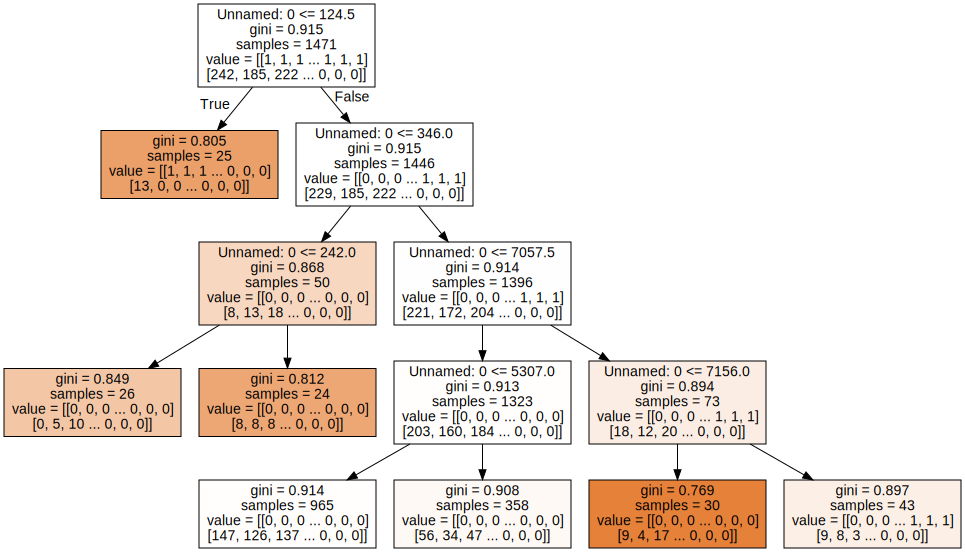

In [100]:
clf = DecisionTreeClassifier(min_samples_leaf=20, max_depth = 4).fit(X_valid, y_valid)


dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=y_test.columns,  
                                filled=True)


graph = graphviz.Source(dot_data, format="png") 
graph